Proximity matrix without using sk learn
[[0.         0.53851648 0.50990195 0.64807407 0.14142136 0.6164414 ]
 [0.53851648 0.         0.3        0.33166248 0.60827625 1.09087121]
 [0.50990195 0.3        0.         0.24494897 0.50990195 1.08627805]
 [0.64807407 0.33166248 0.24494897 0.         0.64807407 1.16619038]
 [0.14142136 0.60827625 0.50990195 0.64807407 0.         0.6164414 ]
 [0.6164414  1.09087121 1.08627805 1.16619038 0.6164414  0.        ]]

Proximity matrix with using sk learn
[[0.         0.53851648 0.50990195 0.64807407 0.14142136 0.6164414 ]
 [0.53851648 0.         0.3        0.33166248 0.60827625 1.09087121]
 [0.50990195 0.3        0.         0.24494897 0.50990195 1.08627805]
 [0.64807407 0.33166248 0.24494897 0.         0.64807407 1.16619038]
 [0.14142136 0.60827625 0.50990195 0.64807407 0.         0.6164414 ]
 [0.6164414  1.09087121 1.08627805 1.16619038 0.6164414  0.        ]]


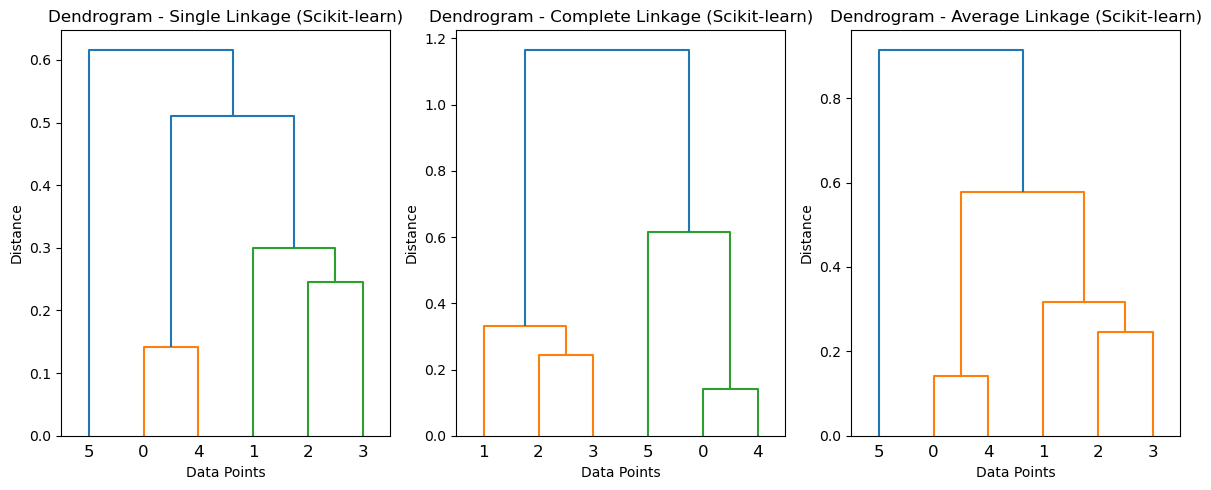

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import load_iris
from sklearn.metrics.pairwise import euclidean_distances

iris = load_iris()
data = iris.data[:6]

def proximity_matrix_custom(data):
    n = data.shape[0]
    proximity_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(i + 1, n):
            proximity_matrix[i, j] = np.linalg.norm(data[i] - data[j])
            proximity_matrix[j, i] = proximity_matrix[i, j]
    return proximity_matrix

def proximity_matrix_sklearn(data):
    proximity_matrix = euclidean_distances(data)
    return proximity_matrix

# Calculate proximity matrices
prox_matrix_custom = proximity_matrix_custom(data)
prox_matrix_sklearn = proximity_matrix_sklearn(data)

print("Proximity matrix without using sk learn")
print(prox_matrix_custom)
print()
print("Proximity matrix with using sk learn")
print(prox_matrix_sklearn)

# Plot dendrograms using scikit-learn's linkage
plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
dendrogram(linkage(prox_matrix_sklearn[np.triu_indices(prox_matrix_sklearn.shape[0], k=1)], method='single'))
plt.title('Dendrogram - Single Linkage (Scikit-learn)')
plt.xlabel('Data Points')
plt.ylabel('Distance')

plt.subplot(1, 3, 2)
dendrogram(linkage(prox_matrix_sklearn[np.triu_indices(prox_matrix_sklearn.shape[0], k=1)], method='complete'))
plt.title('Dendrogram - Complete Linkage (Scikit-learn)')
plt.xlabel('Data Points')
plt.ylabel('Distance')

plt.subplot(1, 3, 3)
dendrogram(linkage(prox_matrix_sklearn[np.triu_indices(prox_matrix_sklearn.shape[0], k=1)], method='average'))
plt.title('Dendrogram - Average Linkage (Scikit-learn)')
plt.xlabel('Data Points')
plt.ylabel('Distance')

plt.tight_layout()
plt.show()